In [1]:
import pennylane as qml
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline
import csv

dev = qml.device('cirq.simulator', wires=2)

In [2]:
@qml.qnode(dev)
def generator(w):
    z = random.uniform(0, 1)*2-1
    
    qml.RY(np.arcsin(z), wires=0)
    qml.RY(np.arcsin(z), wires=1)
    qml.RZ(np.arccos(z), wires=0)
    qml.RZ(np.arccos(z), wires=1)
    qml.RY(w[0], wires=0)
    qml.RY(w[1], wires=1)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    
    qml.CNOT(wires=[0, 1])
    qml.RZ(w[2], wires=1)
    qml.CNOT(wires=[0, 1])
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    
    return qml.expval(qml.PauliZ(0))

In [7]:
samples = []
num_samples = 1000
w = [0.35, 2.10, 5.06]
for i in range(num_samples):
    samples.append(generator(w))

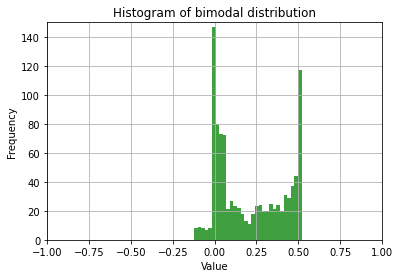

In [9]:
# the histogram of the data
plt.hist(samples, 30, facecolor='g', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of bimodal distribution')
plt.xlim(-1, 1)
plt.ylim(0, 150)
plt.grid(True)
plt.show()

In [ ]:
data = np.array(samples)

In [ ]:
read_data = []
with open('data_bimodal.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for line in csv_reader:
        read_data.append(line)
read_data = np.squeeze(read_data)
read_data = [eval(i) for i in read_data]

In [ ]:
read_data